# **Hands-On Exercise: Building Your First Regression Model with TensorFlow**

## **Objectives**

Understand the core concepts of building a linear regression model.
Get comfortable with basic TensorFlow operations and workflow.
Experience the process of training and evaluating a model.
## **Prerequisites**

Basic Python programming concepts (variables, functions, loops).
A general understanding of what machine learning is.

## **1. Setting Up the Problem**

### **Understanding Linear Regression**

Linear regression is a type of machine learning model that tries to find a straight line that best represents the relationship between an input variable (feature) and an output variable (target).

For example, we could predict the price of a house based on its size in square feet.

### **Generating Sample Data**

Let's first create some sample data to work with. We'll simulate a linear relationship, with some noise added to make it a bit more realistic.

In [ ]:
# Import libraries
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers


## Load the dataset


In [1]:
# Load data
url = "https://raw.githubusercontent.com/pranavdubeyX/Datasets/main/BostonHousing.csv"
boston_df = pd.read_csv(url)

display(boston_df.head())
display(boston_df.info())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


None

## Prepare the data


In [2]:
# Check for missing values
print("Missing values before handling:")
print(boston_df.isnull().sum())

# Define features (X) and target (y)
X = boston_df.drop('medv', axis=1)
y = boston_df['medv']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Missing values before handling:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

Shape of X_train: (404, 13)
Shape of X_test: (102, 13)
Shape of y_train: (404,)
Shape of y_test: (102,)


## Compile the model

In [4]:
# Define Sequential NN layers
input_features = X_train.shape[1]

model = keras.Sequential([
    layers.Dense(units=1, input_shape=[input_features])
])

# Compile the model again
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

- `Dense` is a fully connected layer in a neural network. It's commonly used for input, hidden, and output layers.
- In our code above, we're building a linear regression model, at a basic level, it only needs 1 layer to learn a straight line: y = wx + b (w is weight, x is input and b is bias).
- So, the dense layer defined above is the __output__ layer with: `units=1` to predict 1 value (the target). In other words, the output layer has 1 neuron/node and `input_shape=[1]` informs that we have one input feature "x_data"

## Train the model

In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 43695.4883 - val_loss: 45546.8633
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40508.8438 - val_loss: 41548.0000
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 35548.9102 - val_loss: 37864.3672
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32698.5176 - val_loss: 34445.4961
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29259.1250 - val_loss: 31302.0742
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27336.0059 - val_loss: 28347.7695
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22604.5254 - val_loss: 25697.1367
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21660.7539 - val_loss: 23215.1094
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19826.1016 - val_loss: 20966.3730
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18493.4453 - val_loss: 18878.1426


## Evaluate the model


In [7]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 18479.0215
Test Loss: 18878.142578125


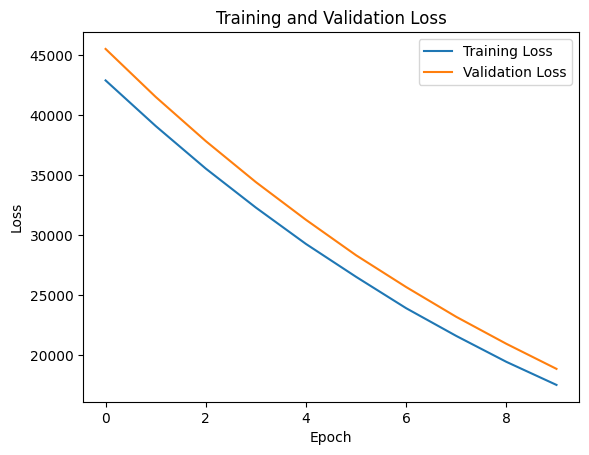

In [10]:
import matplotlib.pyplot as plt

# Get the loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss curves
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# **Conclusion**

In this hands-on exercise, you got your feet wet in the world of TensorFlow! Here's what we accomplished:

* **Learned the fundamentals:** You discovered how linear regression works.
* **Applied TensorFlow:** You built a simple regression model with TensorFlow, understanding concepts like variables and placeholders.
* **Experienced model training:** You trained your model to fit the data and make predictions.

**Useful Resources for Further Learning**

* **TensorFlow Official Website:**  [https://www.tensorflow.org/](https://www.tensorflow.org/) – Tutorials, guides, and comprehensive documentation.
* **Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (Book):** [https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646) –  A fantastic resource for applied machine learning with TensorFlow.
* **TensorFlow Courses on Coursera or Udemy:** These platforms offer structured courses to dive deeper into TensorFlow's capabilities.